In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Wes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
os.chdir('C:\\Users\\Wes\\Desktop\\TextMining\\project')

In [4]:
df = pd.read_csv('nyc-jobs.csv')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,42405.00,65485.00,Annual,110 William St. N Y,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-30T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,60740.00,162014.00,Annual,110 William St. N Y,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-30T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-30T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-30T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,NaN,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-07-30T00:00:00.000


In [7]:
df.drop(['Job ID', 'Posting Type', 'Business Title', 'Full-Time/Part-Time indicator', 'Hours/Shift',
         'Work Location 1', 'Recruitment Contact', 'Residency Requirement', 'Posting Date', 'Post Until',
        'Posting Updated', 'Process Date', 'To Apply'], axis=1, inplace=True)

In [8]:
df.head()

,Agency,# Of Positions,Civil Service Title,Title Code No,Level,Job Category,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information
0,DEPARTMENT OF BUSINESS SERV.,1,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,42405.00,65485.00,Annual,110 William St. N Y,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $..."
1,DEPARTMENT OF BUSINESS SERV.,1,ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,60740.00,162014.00,Annual,110 William St. N Y,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN
2,NYC HOUSING AUTHORITY,52,MAINTENANCE WORKER,90698,0,Maintenance & Operations,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...
3,NYC HOUSING AUTHORITY,52,MAINTENANCE WORKER,90698,0,Maintenance & Operations,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...
4,NYC HOUSING AUTHORITY,50,PAINTER,91830,0,Maintenance & Operations,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,NaN,SPECIAL NOTE: 1. This is a temporary assig...


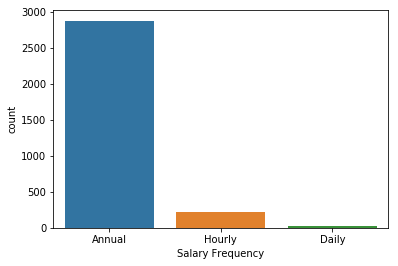

In [9]:
sns.countplot(x='Salary Frequency', data=df)

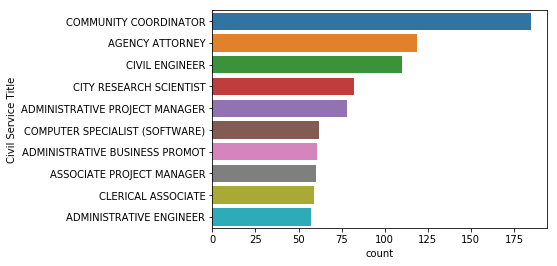

In [10]:
CivilTitlesFreq = df['Civil Service Title'].value_counts()
TopCivilFreqs = CivilTitlesFreq.iloc[:10]
sns.countplot(y='Civil Service Title', data=df, order=TopCivilFreqs.index)

In [11]:
df['Minimum Qual Requirements'].isnull().sum()

12

In [12]:
df['Job Description'].isnull().sum()

0

In [13]:
cols1 = ['Salary Range From','Salary Range To']
df['average salary'] = df[cols1].astype(float).mean(axis=1)

In [14]:
df.head(n=10)

,Agency,# Of Positions,Civil Service Title,Title Code No,Level,Job Category,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,average salary
0,DEPARTMENT OF BUSINESS SERV.,1,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,42405.00,65485.00,Annual,110 William St. N Y,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",53945.0
1,DEPARTMENT OF BUSINESS SERV.,1,ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,60740.00,162014.00,Annual,110 William St. N Y,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,111377.0
2,NYC HOUSING AUTHORITY,52,MAINTENANCE WORKER,90698,0,Maintenance & Operations,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,53244.0
3,NYC HOUSING AUTHORITY,52,MAINTENANCE WORKER,90698,0,Maintenance & Operations,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,1. A Motor Vehicle Driverâ€™s License valid i...,53244.0
4,NYC HOUSING AUTHORITY,50,PAINTER,91830,0,Maintenance & Operations,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,NaN,SPECIAL NOTE: 1. This is a temporary assig...,35.0
5,NYC HOUSING AUTHORITY,50,PAINTER,91830,0,Maintenance & Operations,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,NaN,SPECIAL NOTE: 1. This is a temporary assig...,35.0
6,DEPT OF HEALTH/MENTAL HYGIENE,1,PROCUREMENT ANALYST,12158,3,"Finance, Accounting, & Procurement",50598.00,85053.00,Annual,42-09 28th Street,HIV Administration,** OPEN TO PERMANENT PROCUREMENT ANALYSTS ONLY...,1. A baccalaureate degree from an accredited c...,Strong analytical background; advanced profic...,NaN,67825.5
7,DEPT OF ENVIRONMENT PROTECTION,1,ASSOCIATE CHEMIST,21822,2,"Health Public Safety, Inspections, & Enforcement",50623.00,75083.00,Annual,96-05 Horace Harding Expway,DWOC Labs-Lefrak,Working in the Distribution Water Quality Oper...,Qualification Requirements A baccalaureate de...,"In order to apply for this position, the candi...",NaN,62853.0
8,NYC HOUSING AUTHORITY,1,ADMINISTRATIVE STAFF ANALYST (,1002D,0,"Engineering, Architecture, & Planning",90000.00,110000.00,Annual,CP Cap Plan-Technical Planning,Capital Planning Dept,Reporting to the Deputy Director of Technical ...,1. A master's degree from an accredited colleg...,1. Five years of managerial and supervisory e...,SPECIAL INSTRUCTIONS FOR NYCHA EMPLOYEES: N...,100000.0
9,NYC HOUSING AUTHORITY,4,ASSOCIATE PROJECT MANAGER,22427,2,"Engineering, Architecture, & Planning",62942.00,92249.00,Annual,Office for Exec Proj Manager,Project Mgmt Dept Team 3,The Assistant Project Manager will provide sup...,One year of full-time satisfactory experience ...,1. Five (5) plus years managing construction ...,SPECIAL INSTRUCTIONS FOR NYCHA EMPLOYEES: N...,77595.5


C:\Users\Wes\Anaconda37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

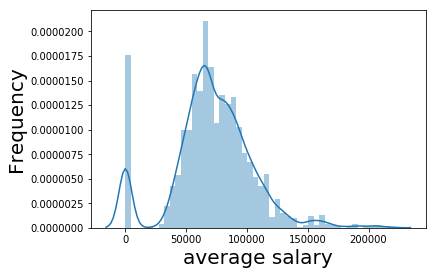

In [15]:
dplot1 = sns.distplot(df['average salary'])
plt.xlabel("average salary", fontsize=20)
plt.ylabel("Frequency",fontsize=20)


In [16]:
df.describe()

,# Of Positions,Salary Range From,Salary Range To,average salary
count,3123.000000,3123.000000,3123.000000,3123.000000
mean,2.623759,58670.745122,85954.696654,72312.720888
std,8.947260,26985.651698,44137.810552,33309.032337
min,1.000000,0.000000,10.360000,9.555000
25%,1.000000,49390.000000,61936.000000,56310.750000
50%,1.000000,58152.000000,81535.000000,70717.000000
75%,1.000000,72476.000000,106222.000000,90000.000000
max,150.000000,218587.000000,234402.000000,218587.000000


Text(0, 0.5, 'count')

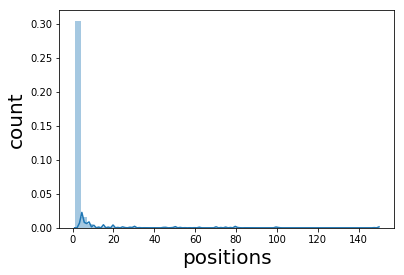

In [17]:
dplot1 = sns.distplot(df['# Of Positions'])
plt.xlabel("positions", fontsize=20)
plt.ylabel("count",fontsize=20)

In [18]:
df['Minimum Qual Requirements'] = df['Minimum Qual Requirements'].str.replace('baccalaureate','bachelor')

In [19]:
requirements = df['Minimum Qual Requirements'].tolist()
[str(i) for i in requirements]
requirements[:10]


['1.\tA bachelor degree from an accredited college and two years of experience in community work or community centered activities in an area related to the duties described above; or  2.\tHigh school graduation or equivalent and six years of experience in community work or community centered activities in an area related to the duties as described above; or  3.\tEducation and/or experience which is equivalent to "1" or "2" above. However, all candidates must have at least one year of experience as described in "1" above.',
 '1. A bachelor degree from an accredited college or university and five years of full-time paid experience acquired within the last fifteen years, of supervisory or administrative experience including handling of business promotion or urban economic problems, at least 2 years of which must have been in a managerial or executive capacity with primary focus on business promotion or urban economic planning; or    2. A satisfactory equivalent combination of education an

In [20]:
requirements=[re.sub("(^b'*)|(\w*\\\w*)|(\w*\:\/\/\w*\.*\w*\/\w*)|(')|(\.*)",'',str(requirement)) for requirement in requirements] #stripping urls and images
requirements=[re.sub("(\@\w*)",'',str(requirement)) for requirement in requirements] #stripping tags
requirements=[re.sub("[^\\w\\s\-\!\.\?]",'',str(requirement)) for requirement in requirements] #stripping away any other non-alphanumeric characters like hashtags
requirements=[re.sub("\!|\?|RT",'',str(requirement)) for requirement in requirements] #stripping away exclamation and question marks, and the Rerequirement tag
requirements=[re.sub("(\d*)|(x\d*)",'',str(requirement)) for requirement in requirements] #Stripping away random numbers leftover after initial cleaning
requirements=[requirement.lower() for requirement in requirements]#making everything lowercase
requirements=[re.sub("(\sa\s)|(\sthe\s)|(\sis\s)|(\sbe\s)|(\syes\s)|(\sthanks\s)|(\sit\s)|(\sits\s)",'',str(requirement)) for requirement in requirements]

In [21]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string

In [22]:
#Tokenizing and removing stop words
tokenizedrequirements = [word_tokenize(word) for word in requirements]

stpwrds=stopwords.words("english")
stpwrds.extend(['the', ' the', 'the ', ' the ', 'a', 'an', ' an', 'an ', 'must', 'described', 'in'])
stop_words=set(stpwrds)

for requirement in tokenizedrequirements:
    for word in requirement:
        if word in stop_words:
            requirement.remove(word)

print(tokenizedrequirements[:5])

[['bachelor', 'degree', 'an', 'accredited', 'college', 'two', 'years', 'eperience', 'community', 'work', 'community', 'centered', 'activities', 'an', 'area', 'related', 'toduties', 'high', 'school', 'graduation', 'equivalent', 'si', 'years', 'eperience', 'community', 'work', 'community', 'centered', 'activities', 'an', 'area', 'related', 'toduties', 'described', 'or', 'education', 'andor', 'eperience', 'whichequivalent', 'or', 'above', 'however', 'candidates', 'have', 'least', 'one', 'year', 'eperience', 'described', 'above'], ['bachelor', 'degree', 'an', 'accredited', 'college', 'university', 'five', 'years', 'full-time', 'paid', 'eperience', 'acquired', 'withinlast', 'fifteen', 'years', 'supervisory', 'administrative', 'eperience', 'including', 'handling', 'business', 'promotion', 'urban', 'economic', 'problems', 'least', 'years', 'which', 'have', 'inmanagerial', 'eecutive', 'capacity', 'primary', 'focus', 'business', 'promotion', 'urban', 'economic', 'planning', 'satisfactory', 'equ

[('eperience', 13222), ('years', 7253), ('an', 6856), ('accredited', 5293), ('one', 5016), ('college', 4964), ('year', 4825), ('satisfactory', 4724), ('education', 4721), ('degree', 4296)]


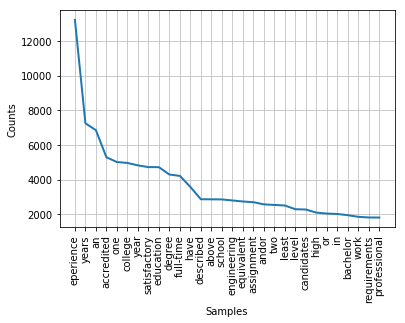

In [23]:
# Looking at word frequency
requirementlist = []
for requirement in tokenizedrequirements:
    for word in requirement:
        requirementlist.append(word)
fdist = FreqDist(requirementlist)
print(fdist.most_common(10)) 
fdist.N()  # freq of each
# Visualize word frequency
fdist.plot(30,cumulative=False)
plt.show()

In [24]:
df['Minimum Qual Requirements'].head(n = 5)

0    1.\tA bachelor degree from an accredited colle...
1    1. A bachelor degree from an accredited colleg...
2    1. Three years of full-time satisfactory exper...
3    1. Three years of full-time satisfactory exper...
4    1. Five years of full-time satisfactory experi...
Name: Minimum Qual Requirements, dtype: object

In [25]:
nulls = df.isnull().sum().sort_values(ascending = False)
nulls

Additional Information       1186
Preferred Skills              375
Minimum Qual Requirements      12
Job Category                    2
average salary                  0
Job Description                 0
Division/Work Unit              0
Work Location                   0
Salary Frequency                0
Salary Range To                 0
Salary Range From               0
Level                           0
Title Code No                   0
Civil Service Title             0
# Of Positions                  0
Agency                          0
dtype: int64

In [26]:
df['Job Description'] =  df['Job Description'].str.lower()
df['Minimum Qual Requirements'] =  df['Minimum Qual Requirements'].str.lower()
df['Preferred Skills'] =  df['Preferred Skills'].str.lower()

In [27]:
df.head()

,Agency,# Of Positions,Civil Service Title,Title Code No,Level,Job Category,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,average salary
0,DEPARTMENT OF BUSINESS SERV.,1,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,42405.00,65485.00,Annual,110 William St. N Y,Strategy & Analytics,division of economic & financial opportunity (...,1.\ta bachelor degree from an accredited colle...,â€¢\texcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",53945.0
1,DEPARTMENT OF BUSINESS SERV.,1,ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,60740.00,162014.00,Annual,110 William St. N Y,Tech Talent Pipeline,the new york city department of small business...,1. a bachelor degree from an accredited colleg...,NaN,NaN,111377.0
2,NYC HOUSING AUTHORITY,52,MAINTENANCE WORKER,90698,0,Maintenance & Operations,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"under direct supervision, assist in the routin...",1. three years of full-time satisfactory exper...,1. a high school diploma or ged. 2. cdl dri...,1. A Motor Vehicle Driverâ€™s License valid i...,53244.0
3,NYC HOUSING AUTHORITY,52,MAINTENANCE WORKER,90698,0,Maintenance & Operations,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,"under direct supervision, assist in the routin...",1. three years of full-time satisfactory exper...,1. a high school diploma or ged. 2. cdl dri...,1. A Motor Vehicle Driverâ€™s License valid i...,53244.0
4,NYC HOUSING AUTHORITY,50,PAINTER,91830,0,Maintenance & Operations,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,responsibilities of selected candidates will i...,1. five years of full-time satisfactory experi...,NaN,SPECIAL NOTE: 1. This is a temporary assig...,35.0


In [28]:
df['Job Description'] = df['Job Description'].str.replace('[^a-zA-Z0-9 ]', '', regex=True)
df['Minimum Qual Requirements'] = df['Minimum Qual Requirements'].str.replace('[^a-zA-Z0-9 ]', '', regex=True)
df['Preferred Skills'] = df['Preferred Skills'].str.replace('[^a-zA-Z0-9 ]', '', regex=True)

In [29]:
df['Job Description'].head(n = 2)


0    division of economic  financial opportunity de...
1    the new york city department of small business...
Name: Job Description, dtype: object

In [30]:
df['Minimum Qual Requirements'].head(n = 2)

0    1a bachelor degree from an accredited college ...
1    1 a bachelor degree from an accredited college...
Name: Minimum Qual Requirements, dtype: object

In [31]:
df['Preferred Skills'].head(n = 3)

0    excellent interpersonal and organizational ski...
1                                                  NaN
2    1  a high school diploma or ged  2  cdl driver...
Name: Preferred Skills, dtype: object

In [32]:
df['Minimum Qual Requirements'] = df['Minimum Qual Requirements'].str.replace('baccalaureate','bachelor')

In [33]:
df['Minimum Qual Requirements'].head(n = 2)

0    1a bachelor degree from an accredited college ...
1    1 a bachelor degree from an accredited college...
Name: Minimum Qual Requirements, dtype: object

In [34]:

df['salary_bins'] = pd.cut(x=df['average salary'], bins=[1, 20000, 50000, 70000, 100000, 150000, 220000])

In [35]:
df.head(n=5)

,Agency,# Of Positions,Civil Service Title,Title Code No,Level,Job Category,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,average salary,salary_bins
0,DEPARTMENT OF BUSINESS SERV.,1,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,42405.00,65485.00,Annual,110 William St. N Y,Strategy & Analytics,division of economic financial opportunity de...,1a bachelor degree from an accredited college ...,excellent interpersonal and organizational ski...,"Salary range for this position is: $42,405 - $...",53945.0,"(50000, 70000]"
1,DEPARTMENT OF BUSINESS SERV.,1,ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,60740.00,162014.00,Annual,110 William St. N Y,Tech Talent Pipeline,the new york city department of small business...,1 a bachelor degree from an accredited college...,NaN,NaN,111377.0,"(100000, 150000]"
2,NYC HOUSING AUTHORITY,52,MAINTENANCE WORKER,90698,0,Maintenance & Operations,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,under direct supervision assist in the routine...,1 three years of fulltime satisfactory experie...,1 a high school diploma or ged 2 cdl driver...,1. A Motor Vehicle Driverâ€™s License valid i...,53244.0,"(50000, 70000]"
3,NYC HOUSING AUTHORITY,52,MAINTENANCE WORKER,90698,0,Maintenance & Operations,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,under direct supervision assist in the routine...,1 three years of fulltime satisfactory experie...,1 a high school diploma or ged 2 cdl driver...,1. A Motor Vehicle Driverâ€™s License valid i...,53244.0,"(50000, 70000]"
4,NYC HOUSING AUTHORITY,50,PAINTER,91830,0,Maintenance & Operations,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,responsibilities of selected candidates will i...,1 five years of fulltime satisfactory experien...,NaN,SPECIAL NOTE: 1. This is a temporary assig...,35.0,"(1, 20000]"


In [36]:
df['salary_level'] = pd.cut(x=df['average salary'], bins=[1, 20000, 50000, 70000, 100000, 150000, 220000],
                            labels=['low', 'low_average', 'average','average_high','high','very_high'])

In [37]:
df.head(n=6)

,Agency,# Of Positions,Civil Service Title,Title Code No,Level,Job Category,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,average salary,salary_bins,salary_level
0,DEPARTMENT OF BUSINESS SERV.,1,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,42405.00,65485.00,Annual,110 William St. N Y,Strategy & Analytics,division of economic financial opportunity de...,1a bachelor degree from an accredited college ...,excellent interpersonal and organizational ski...,"Salary range for this position is: $42,405 - $...",53945.0,"(50000, 70000]",average
1,DEPARTMENT OF BUSINESS SERV.,1,ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,60740.00,162014.00,Annual,110 William St. N Y,Tech Talent Pipeline,the new york city department of small business...,1 a bachelor degree from an accredited college...,NaN,NaN,111377.0,"(100000, 150000]",high
2,NYC HOUSING AUTHORITY,52,MAINTENANCE WORKER,90698,0,Maintenance & Operations,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,under direct supervision assist in the routine...,1 three years of fulltime satisfactory experie...,1 a high school diploma or ged 2 cdl driver...,1. A Motor Vehicle Driverâ€™s License valid i...,53244.0,"(50000, 70000]",average
3,NYC HOUSING AUTHORITY,52,MAINTENANCE WORKER,90698,0,Maintenance & Operations,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,under direct supervision assist in the routine...,1 three years of fulltime satisfactory experie...,1 a high school diploma or ged 2 cdl driver...,1. A Motor Vehicle Driverâ€™s License valid i...,53244.0,"(50000, 70000]",average
4,NYC HOUSING AUTHORITY,50,PAINTER,91830,0,Maintenance & Operations,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,responsibilities of selected candidates will i...,1 five years of fulltime satisfactory experien...,NaN,SPECIAL NOTE: 1. This is a temporary assig...,35.0,"(1, 20000]",low
5,NYC HOUSING AUTHORITY,50,PAINTER,91830,0,Maintenance & Operations,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,responsibilities of selected candidates will i...,1 five years of fulltime satisfactory experien...,NaN,SPECIAL NOTE: 1. This is a temporary assig...,35.0,"(1, 20000]",low


In [38]:
df['salary_level'] = pd.Categorical(df.salary_level)

In [39]:
print (df.dtypes)

Agency                         object
# Of Positions                  int64
Civil Service Title            object
Title Code No                  object
Level                          object
Job Category                   object
Salary Range From             float64
Salary Range To               float64
Salary Frequency               object
Work Location                  object
Division/Work Unit             object
Job Description                object
Minimum Qual Requirements      object
Preferred Skills               object
Additional Information         object
average salary                float64
salary_bins                  category
salary_level                 category
dtype: object


In [40]:
df['Minimum Qual Requirements'].isnull().sum()

12

In [41]:
df = df[df['Minimum Qual Requirements'].notnull()].reset_index(drop=True)

In [42]:
df['Minimum Qual Requirements'].isnull().sum()

0

In [43]:
y = df.salary_level.cat.codes
X=df['Minimum Qual Requirements'].values

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [45]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(1866,) (1866,) (1245,) (1245,)


In [46]:
training_labels = set(y_train)
print(training_labels)
from scipy.stats import itemfreq
training_category_dist = itemfreq(y_train)
print(training_category_dist)

{0, 1, 2, 3, 4, 5}
[[  0 156]
 [  1 190]
 [  2 593]
 [  3 636]
 [  4 248]
 [  5  43]]


C:\Users\Wes\Anaconda37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  after removing the cwd from sys.path.


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
NLTKstopwords = set(stopwords.words('english'))
morestopwords = ['should', 'or', 'in', 'an','would','could','like','one','even']
stopwords = NLTKstopwords.union(morestopwords)

In [68]:
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words=stopwords)
bigram_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words=stopwords)

In [49]:
X_train_vec = unigram_count_vectorizer.fit_transform(X_train)

print(X_train_vec.shape)
print(X_train_vec[0].toarray())

print(len(unigram_count_vectorizer.vocabulary_))

print(list(unigram_count_vectorizer.vocabulary_.items())[:10])

print(unigram_count_vectorizer.vocabulary_.get('degree'))

(1866, 1029)
[[0 0 0 ... 3 0 0]]
1029
[('bachelor', 125), ('degree', 271), ('accredited', 43), ('college', 199), ('computer', 215), ('science', 835), ('engineering', 340), ('human', 470), ('interaction', 508), ('interactive', 509)]
271


In [50]:
X_test_vec = unigram_count_vectorizer.transform(X_test)

# number of examples and number of features in the test set
print(X_test_vec.shape)

(1245, 1029)


In [51]:
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf= MultinomialNB()

# using the training data to train the MNB model
nb_clf.fit(X_train_vec,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [52]:
unigram_count_vectorizer.vocabulary_.get('amazing')
for i in range(0,5):
  print(nb_clf.feature_log_prob_[i][unigram_count_vectorizer.vocabulary_.get('masters')])

-6.288124058636727
-8.377164546812535
-5.553289400228038
-5.241776739366697
-5.507515068374935


In [53]:
from pprint import pprint
feature_ranks = sorted(zip(nb_clf.feature_log_prob_[0], unigram_count_vectorizer.get_feature_names()))
very_low_features = feature_ranks[-30:]
pprint(very_low_features)

[(-4.832836826029886, 'science'),
 (-4.79201483150963, 'semester'),
 (-4.77614148235334, 'must'),
 (-4.768298304892315, 'equivalent'),
 (-4.729979440590178, 'conditioned'),
 (-4.729979440590178, 'credits'),
 (-4.715053790373502, 'continuance'),
 (-4.715053790373502, 'described'),
 (-4.715053790373502, 'matriculation'),
 (-4.7003476429838065, 'acceptable'),
 (-4.7003476429838065, 'upon'),
 (-4.6930748836547265, 'including'),
 (-4.678686146202628, 'year'),
 (-4.636721947103595, 'employment'),
 (-4.496364589408673, 'education'),
 (-4.444178836238103, 'course'),
 (-4.4218315375461055, 'satisfactory'),
 (-4.4218315375461055, 'study'),
 (-4.332061538117396, 'fulltime'),
 (-4.208682516956892, 'level'),
 (-4.177910858290138, 'accredited'),
 (-4.177910858290138, 'student'),
 (-4.014526502515934, 'assignment'),
 (-3.9713543306507253, 'graduate'),
 (-3.8709355829036785, 'years'),
 (-3.8365033864821942, 'technology'),
 (-3.753860511878635, 'information'),
 (-3.6516210088265657, 'school'),
 (-3.587

In [54]:
feature_ranksNew = sorted(zip(nb_clf.feature_log_prob_[5], unigram_count_vectorizer.get_feature_names()))
very_top_features = feature_ranksNew[-30:]
pprint(very_top_features)

[(-5.152327739001473, 'systems'),
 (-5.072285031327937, 'business'),
 (-5.072285031327937, 'computer'),
 (-5.072285031327937, 'programming'),
 (-5.034544703345089, 'candidates'),
 (-5.034544703345089, 'responsible'),
 (-4.998177059174214, 'including'),
 (-4.963085739362944, 'fulltime'),
 (-4.896394364864272, '18'),
 (-4.896394364864272, 'data'),
 (-4.8338740078829385, 'andor'),
 (-4.775033507860005, 'bachelor'),
 (-4.775033507860005, 'least'),
 (-4.719463656705194, 'administration'),
 (-4.692795409623033, 'capacity'),
 (-4.666819923219772, 'satisfactory'),
 (-4.61680950264511, 'months'),
 (-4.59271195106605, 'described'),
 (-4.59271195106605, 'education'),
 (-4.569181453655856, 'administrative'),
 (-4.569181453655856, 'executive'),
 (-4.501740172860323, 'equivalent'),
 (-4.48023396763936, 'management'),
 (-4.360089655797296, 'managerial'),
 (-4.323048384116947, 'accredited'),
 (-4.252844125443699, 'degree'),
 (-4.219507705176107, 'college'),
 (-3.9736727426598266, 'must'),
 (-3.7977820

In [55]:
nb_clf.score(X_test_vec,y_test) *100

65.06024096385542

In [56]:
from sklearn.metrics import confusion_matrix
y_pred = nb_clf.fit(X_train_vec, y_train).predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])
print(cm)

from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4','5']
print(classification_report(y_test, y_pred, target_names=target_names))

[[ 54  14  22   4   0   0]
 [  0  84  37   1   1   0]
 [  1  44 296  25  16   4]
 [  3   7  41 282  79  33]
 [  2   0  16  50  81  26]
 [  0   0   4   2   3  13]]
              precision    recall  f1-score   support

           0       0.90      0.57      0.70        94
           1       0.56      0.68      0.62       123
           2       0.71      0.77      0.74       386
           3       0.77      0.63      0.70       445
           4       0.45      0.46      0.46       175
           5       0.17      0.59      0.27        22

   micro avg       0.65      0.65      0.65      1245
   macro avg       0.60      0.62      0.58      1245
weighted avg       0.69      0.65      0.66      1245



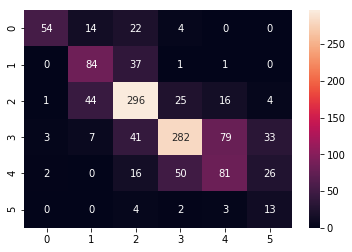

In [57]:
hm1 = sns.heatmap(cm, annot = True, fmt = "d")

In [58]:
from sklearn.svm import LinearSVC


svm_clf = LinearSVC(C=1)


svm_clf.fit(X_train_vec,y_train)

C:\Users\Wes\Anaconda37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [59]:
feature_ranks2 = sorted(zip(svm_clf.coef_[0], unigram_count_vectorizer.get_feature_names()))
feature_ranks2VP = sorted(zip(svm_clf.coef_[5], unigram_count_vectorizer.get_feature_names()))

very_low_30 = feature_ranks2[-30:]
print("Words associated with low pay")
for i in range(0, len(very_low_30)):
    print(very_low_30[i])
print()

Words associated with low pay
(0.22621662256147454, 'endorsement')
(0.2266068684981074, 'buildings')
(0.228268929466962, 'enrolled')
(0.22862705130337097, '10')
(0.22919268083370575, 'sufficient')
(0.23376226592893262, 'credited')
(0.2338161032615198, 'license')
(0.23672768660644433, 'ability')
(0.23690963247191416, 'law')
(0.24054771463484692, 'student')
(0.2407052630547564, 'library')
(0.24151295561454064, 'practice')
(0.24910194695591525, 'disqualified')
(0.2517296691595271, 'grade')
(0.26959305757563373, 'suspensions')
(0.28006890479811153, 'maintained')
(0.2803468428870735, 'department')
(0.280425178936968, 'maximum')
(0.2957990485266228, 'three')
(0.31203955534833683, 'agency')
(0.31921088583708573, 'university')
(0.32626204299962974, 'helper')
(0.3347994050054648, 'archival')
(0.34238498420157115, 'machinist')
(0.35548785384229264, 'program')
(0.3899381072589293, 'upon')
(0.41427408257368725, 'committee')
(0.44489183074903343, 'required')
(0.5202213519040169, 'candidates')
(1.01

In [60]:
very_high_30 = feature_ranks2VP[-30:]
print("Words associated with high pay")
for i in range(0, len(very_high_30)):
    print(very_high_30[i])
print()

Words associated with high pay
(0.11125855044319603, 'qualify')
(0.11445306789497403, 'paid')
(0.11962543035809009, 'similar')
(0.12056152660757999, 'level')
(0.13687264882562636, 'university')
(0.14249764495366457, 'mentioned')
(0.1485700437447347, '1a')
(0.15843484965358529, 'services')
(0.15917480623633493, 'executive')
(0.16871962425576664, 'staff')
(0.17292948627993365, 'large')
(0.1841550798386673, 'responsibilities')
(0.18462001496934174, 'administration')
(0.18565568215822018, 'capacity')
(0.18677277203052553, 'organization')
(0.2020548574607908, 'duties')
(0.2110605700598884, 'practice')
(0.2114246131464746, 'progressively')
(0.2394071061434082, 'combination')
(0.252355056575697, '2a')
(0.26405133406547737, 'description')
(0.2721458408277465, 'management')
(0.2794619775560157, 'years')
(0.29694535948702044, 'consultative')
(0.29710935285108675, 'requirements')
(0.3318116699370127, 'urban')
(0.42215289112665766, 'andor')
(0.4636082706026464, 'housing')
(0.5761030656488828, 'fiv

In [61]:
svm_clf.score(X_test_vec,y_test) *100

73.81526104417671

In [62]:
y_pred2 = svm_clf.predict(X_test_vec)
cm2=confusion_matrix(y_test, y_pred2, labels=[0,1,2,3,4,5])
print(cm2)
print()

from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4','5']
print(classification_report(y_test, y_pred2, target_names=target_names))

[[ 62  15  14   3   0   0]
 [  2  86  30   5   0   0]
 [  1  23 310  46   6   0]
 [  3   2  33 388  19   0]
 [  1   0  13  97  64   0]
 [  0   0   0  11   2   9]]

              precision    recall  f1-score   support

           0       0.90      0.66      0.76        94
           1       0.68      0.70      0.69       123
           2       0.78      0.80      0.79       386
           3       0.71      0.87      0.78       445
           4       0.70      0.37      0.48       175
           5       1.00      0.41      0.58        22

   micro avg       0.74      0.74      0.74      1245
   macro avg       0.79      0.63      0.68      1245
weighted avg       0.74      0.74      0.73      1245



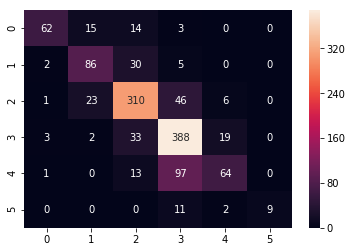

In [63]:
hm2 = sns.heatmap(cm2, annot = True, fmt = "d")

In [70]:
X_train_vec2 = bigram_count_vectorizer.fit_transform(X_train)


print(X_train_vec2.shape)
print(X_train_vec2[0].toarray())


print(len(bigram_count_vectorizer.vocabulary_))


print(list(bigram_count_vectorizer.vocabulary_.items())[:20])


print(bigram_count_vectorizer.vocabulary_.get('masters degree'))

(1866, 4162)
[[0 0 0 ... 0 0 0]]
4162
[('bachelor', 487), ('degree', 1042), ('accredited', 115), ('college', 734), ('computer', 834), ('science', 3355), ('engineering', 1369), ('human', 1957), ('interaction', 2081), ('interactive', 2083), ('media', 2435), ('digital', 1184), ('graphics', 1868), ('design', 1135), ('data', 1008), ('visualization', 3974), ('communication', 798), ('related', 3143), ('field', 1686), ('four', 1782)]
2391


In [76]:
X_test_vec2 = bigram_count_vectorizer.transform(X_test)
print(X_test_vec2.shape)

(1245, 4162)


In [71]:
svm_clf2 = LinearSVC(C=1)


svm_clf2.fit(X_train_vec2,y_train)

C:\Users\Wes\Anaconda37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [73]:
feature_ranksBG2 = sorted(zip(svm_clf2.coef_[0], bigram_count_vectorizer.get_feature_names()))
feature_ranksBG2VP = sorted(zip(svm_clf2.coef_[5], bigram_count_vectorizer.get_feature_names()))
very_low_featuresBG2 = feature_ranksBG2[-30:]
pprint(very_low_featuresBG2)

[(0.12753043068710007, 'university six'),
 (0.12858394333777867, 'make equivalent'),
 (0.128883530135879, 'employment'),
 (0.12894086379381656, 'program accredited'),
 (0.1308748823740406, 'license'),
 (0.1326105286771497, 'enrolled'),
 (0.13261052867714976, 'degree program'),
 (0.14103381100266157, 'school health'),
 (0.14215676022268378, 'student'),
 (0.14759400694031846, 'archival'),
 (0.14804009741559176, 'maximum'),
 (0.15344031817491266, 'school maximum'),
 (0.15815873922697213, 'acceptable experience'),
 (0.1582785871142346, 'grade'),
 (0.1596835234584026, 'ability'),
 (0.15971389510443515, 'issued new'),
 (0.1635698518217515, 'equivalent however'),
 (0.17848804315623798, 'helper'),
 (0.1786172566582447, 'program'),
 (0.19618447693107316, 'law'),
 (0.23395081478784963, 'endorsement'),
 (0.24354396924168528, 'upon'),
 (0.27467175106992503, 'required'),
 (0.28986380031361103, 'license registered'),
 (0.2951599173339066, 'agency'),
 (0.31073491148670246, 'possession'),
 (0.31638708

In [74]:
very_high_featuresBG2 = feature_ranksBG2VP[-30:]
pprint(very_high_featuresBG2)

[(0.08667536494464705, 'college three'),
 (0.08848106106100671, 'organizational'),
 (0.08850575888259359, 'satisfactory fulltime'),
 (0.09198976434381526, 'practice'),
 (0.09216273110242894, 'capacity'),
 (0.09281638461905727, 'similar'),
 (0.09480112140414564, 'combination education'),
 (0.09707227164025206, '2a'),
 (0.10391908047499766, 'duties'),
 (0.10833636436768833, 'organization'),
 (0.10890860585776532, 'years progressively'),
 (0.11061203621342547, 'years administrative'),
 (0.118717173599244, 'consultative capacity'),
 (0.1200053132445187, 'executive'),
 (0.13622053648872612, 'combination'),
 (0.13828976409034605, 'experience administrative'),
 (0.1450093850123748, 'administration'),
 (0.15980428602206015, 'management'),
 (0.1628722919889268, 'years'),
 (0.20204615768905815, 'consultative'),
 (0.2081763195310034, 'five years'),
 (0.20817631953100346, 'five'),
 (0.2100025845225248, 'executive consultative'),
 (0.23335234079033612, 'urban'),
 (0.2636325167652663, 'andor'),
 (0.

In [77]:
svm_clf2.score(X_test_vec2,y_test) *100

75.02008032128515

In [78]:
y_predBG2 = svm_clf2.predict(X_test_vec2)
cmBG2=confusion_matrix(y_test, y_predBG2, labels=[0,1,2,3,4,5])
print(cmBG2)
print()

target_names = ['0','1','2','3','4','5']
print(classification_report(y_test, y_predBG2, target_names=target_names))

[[ 64  15  12   3   0   0]
 [  2  89  29   3   0   0]
 [  1  27 321  35   2   0]
 [  3   1  38 376  27   0]
 [  1   1  14  86  73   0]
 [  0   0   0   4   7  11]]

              precision    recall  f1-score   support

           0       0.90      0.68      0.78        94
           1       0.67      0.72      0.70       123
           2       0.78      0.83      0.80       386
           3       0.74      0.84      0.79       445
           4       0.67      0.42      0.51       175
           5       1.00      0.50      0.67        22

   micro avg       0.75      0.75      0.75      1245
   macro avg       0.79      0.67      0.71      1245
weighted avg       0.75      0.75      0.74      1245



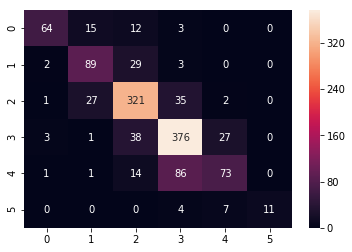

In [79]:
hmBG2 = sns.heatmap(cmBG2, annot= True, fmt= "d")

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

nb_clf_pipe1 = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words=stopwords)),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe1, X, y, cv=10, scoring='accuracy')
avg=sum(scores)/len(scores)
print(avg)

0.6027261801845111


In [81]:
svm_clf_pipe1 = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words=stopwords)),('svm', svm_clf)])
scores1 = cross_val_score(svm_clf_pipe1, X, y, cv=10, scoring='accuracy')

avg=sum(scores1)/len(scores1)
print(avg)

C:\Users\Wes\Anaconda37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Wes\Anaconda37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Wes\Anaconda37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Wes\Anaconda37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Wes\Anaconda37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

0.6971315940748747


C:\Users\Wes\Anaconda37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
